### Ejercicio 1


#### Respuesta 
Realizando la sustitución tenemos un pliniomio muy sencillo para encontrar sus valores propios y como esta igualada a cero no tiene solución particular, por lo tanto encontramos que:
$$m \ddot{x} + b \dot{x} + kx = 0$$
Resolviendo el polinomio caracteristico tenemos que:
$$x(t) = \frac{2 A cos(\frac{(3t)^\frac{1}{2}}{2})}{e^\frac{t}{2}}$$

In [6]:
using PyPlot

In [18]:
function Runge(f::Function,x0,y0,t0,h,N) 
    T = []
    X = []
    Y = []
    t = t0
    x = x0
    y = y0
    while t<=N
        push!(T,t)
        push!(X,x)
        push!(Y,y)
        k1=(f(t,x)) 
        k2=(f(t+(h/2),x+(h*k1/2)))
        k3=f(t+(h/2),x+(h*k2/2))
        k4=f(t+h,x+(h*k3))
        t=t+h 
        x= x + (h/6)*(k1+(2(k2+k3))+k4) 
        y=f(t,x) 
    end
    plot(X,Y) 
end

Runge (generic function with 2 methods)

In [25]:
f(t,x)=-(cos(0.866*t)+(1.732*sin(0.866*t)))/exp(t/2)


f (generic function with 1 method)

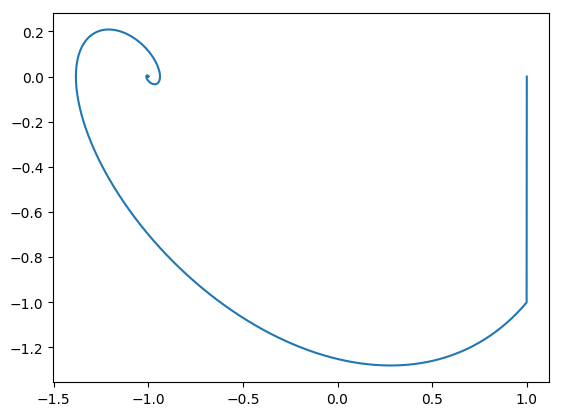

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f68ec534ad0>

In [24]:
Runge(f,1,0,0,0.001,100)

In [28]:
function Euler(f,x0,y0,t0,h,N) 
    T = [] 
    X = []
    Y=[]
    t=t0 
    x = x0
    y=y0
    while t<=N 
        push!(T,t) 
        push!(X,x) 
        push!(Y,y)
        t=t+h
        s=f(t,x)
        x = x + h*s 
        y=f(t,x)
    end  
    plot(X,Y,"black") 
end

Euler (generic function with 1 method)

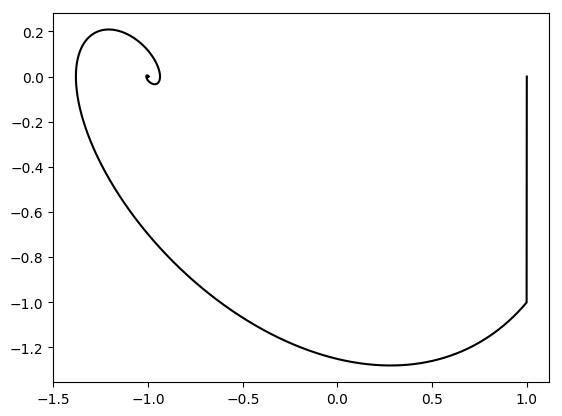

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f68ec06e7d0>

In [29]:
Euler(f,1,0,0,0.001,100)

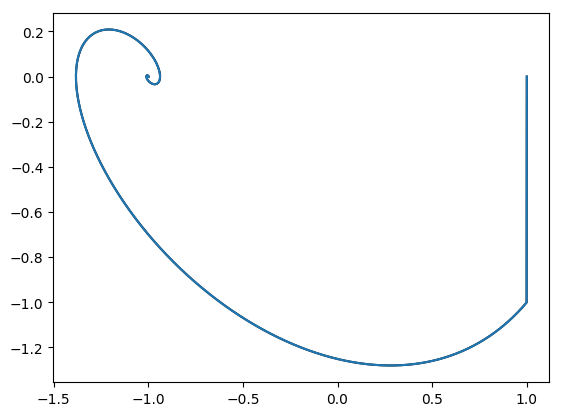

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f68ec41ab90>

In [31]:
Euler(f,1,0,0,0.001,100)
Runge(f,1,0,0,0.001,100)

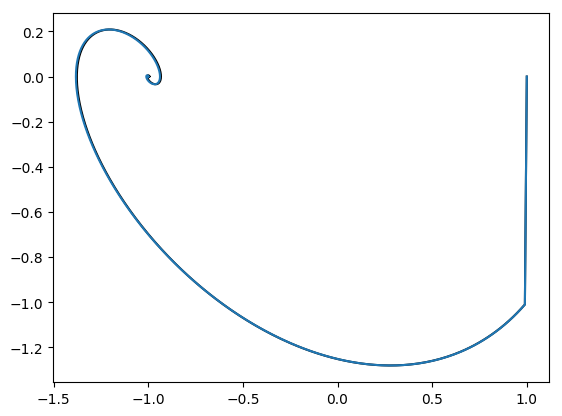

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f68ec3662d0>

In [32]:
Euler(f,1,0,0,0.01,100)
Runge(f,1,0,0,0.01,100)

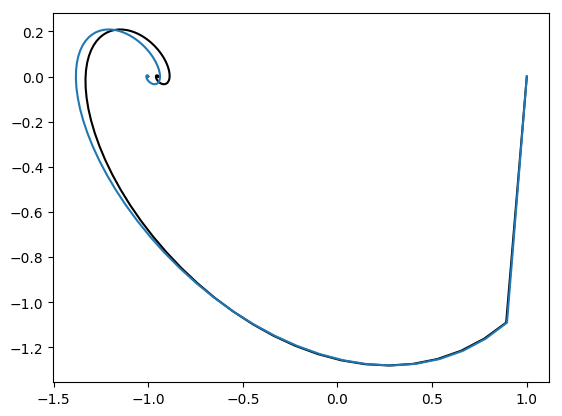

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f68ec21db50>

In [33]:
Euler(f,1,0,0,0.1,100)
Runge(f,1,0,0,0.1,100)

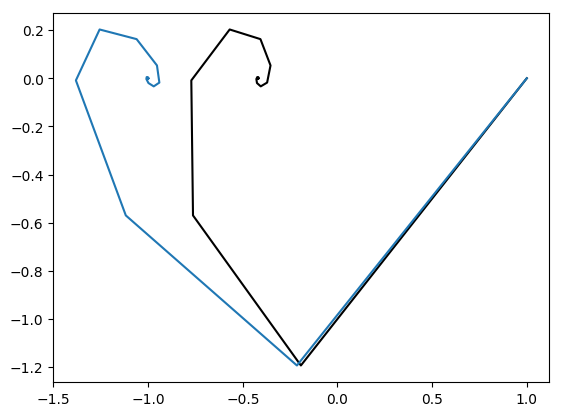

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f68ec0e7690>

In [34]:
Euler(f,1,0,0,1,100)
Runge(f,1,0,0,1,100)

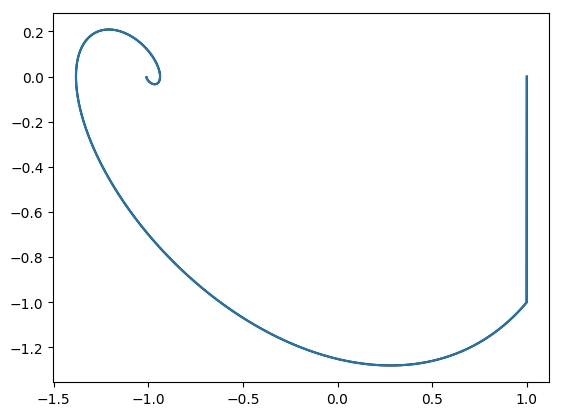

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f68ebfb5110>

In [35]:
Euler(f,1,0,0,0.001,10)
Runge(f,1,0,0,0.001,10)

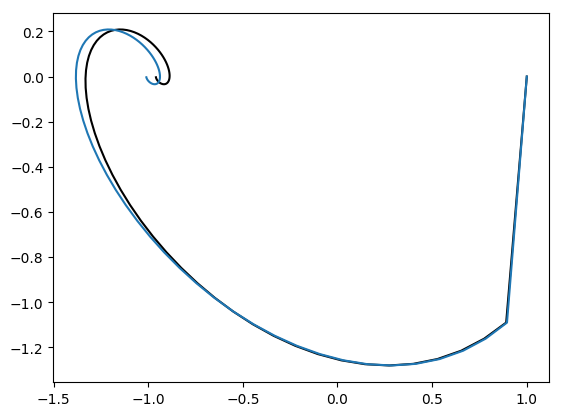

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f68eb7e2190>

In [36]:
Euler(f,1,0,0,0.1,10)
Runge(f,1,0,0,0.1,10)

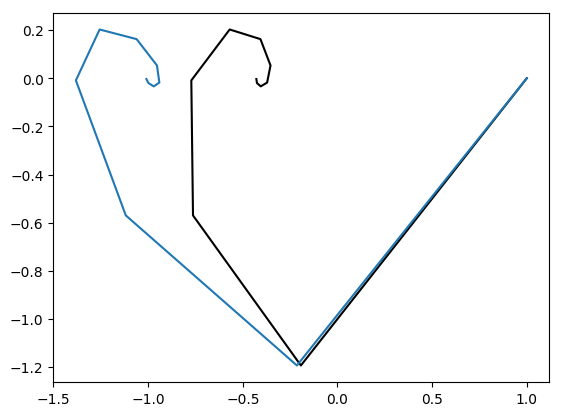

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f68ec18ab10>

In [37]:
Euler(f,1,0,0,1,10)
Runge(f,1,0,0,1,10)

### Ejercicio 2
#### Respuesta
$$ \theta(t)= \alpha sen(t)$$
$$ \dot\theta(t) = \alpha cos(t)$$
$$ \ddot\theta(t) = -sin(\theta)$$
Esto porque $g=l=1$ por lo tanto $w =1$

In [62]:
function RK4(f,x0,t0,tf,h)
    t=t0:h:tf
    x=[x0[1]] # Posición
    v=[x0[2]]   #Velocidad
    for i in 2:length(t)
       #Pasos de R.k.4 
    k1=f(x0,t[i-1])
    k2=f(x0+(h/2)*k1,t[i-1]+h/2) 
    k3=f(x0+(h/2)*k2,t[i-1]+h/2) 
    k4=f(x0+h*k3,t[i]+h)
        
    x0=x0+(h/6)*(k1+2k2+2k3+k4)
        
        push!(x,x0[1])
        push!(v,x0[2])
    end
    return t,x,v
end

RK4 (generic function with 1 method)

In [54]:
function RK4(f,x0,t0,tf,h)
    t=t0:h:tf
    r=[x0]
    x=x0
    for i in 1:length(t)-1      
    k1=f(x,t[i])
    k2=f(x+(h/2)*k1,t[i]+h/2)  
    k3=f(x+(h/2)*k2,t[i]+h/2) 
    k4=f(x+h*k3,t[i]+h)
        
    x=x+(h/6)*(k1+2k2+2k3+k4)
        
        push!(r,x)
    end
    return t,r
end

RK4 (generic function with 1 method)

#### Condiciones iniciales

In [4]:
f(x,t)=[x[2],-sin(x[1])]

f (generic function with 1 method)

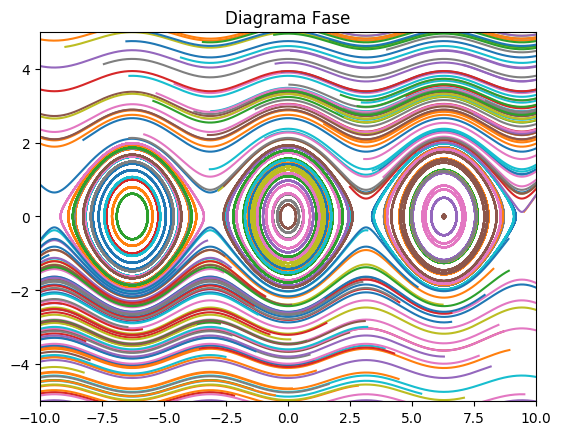

In [9]:
for i in 1:500
    x0=(rand(2)-rand(2))*18  
    random=RK4(f,x0,-30.0,30.0,0.01)  
    plot(random[2],random[3])
    xlim(-10,10),ylim(-5,5)
    title("Diagrama Fase")
end

### Ejercio 3

In [99]:
g(x,t)=[x[1]^2-1,0]

g (generic function with 1 method)

In [104]:
function espaciosase(g)  
for i in 1:400
    random=5*(rand(1))-2
    pf=RK4(g,[random[1],0],-3.0,3.0,0.01)
    plot(pf[2],pf[1])
    xlim(-5,5),ylim(-3,3)
    title("Diagrama Fase")
end
end

espaciosase (generic function with 1 method)

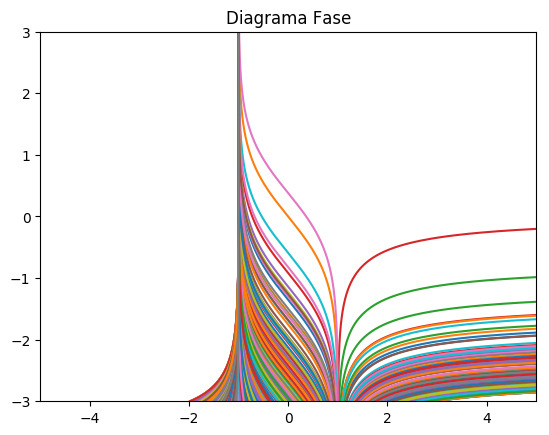

In [105]:
espaciosase(g)  

Podemos ver que cuanto ms nos acercamos al -1 la gráfica tiende a ese punto, es decir, converge. Mientras que en el menos 1 diverge.

### Ejercicio 4

In [94]:
h(x,t)=[x[1]^2,0]

h (generic function with 1 method)

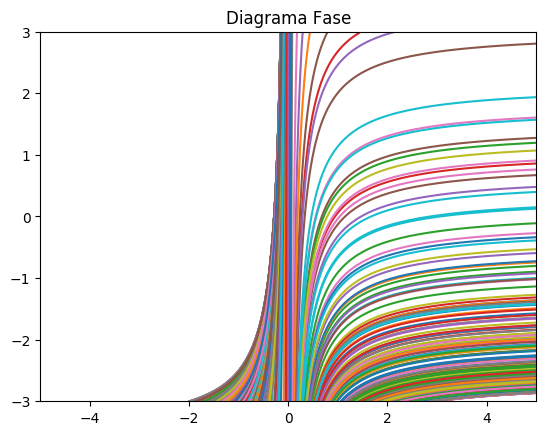

In [106]:
espaciosase(h)  

El un punto fijo lo podemos ver en el cero y vemos que por un lado es repulsor y por otro es atractor esto se debe a que cuando $x<0$ la derivada es negativa y cuando $x>0$ la derivada es positiva.

### Ejercicio 5

In [107]:
function espaciofase2(a,b,c,d)
    f(x,t)=[a*x[1]+b*x[2],c*x[1]+d*x[2]]
    for i in 1:400
    random=5*(rand(1))-2
    random2=5*(rand(1))-1
    pf=RK4(f,[random[1],random2[1]],-3.0,3.0,0.01)
    plot(pf[2],pf[3])
    xlim(-5,5),ylim(-3,3)
    title("Diagrama Fase")
end
end

espaciofase2 (generic function with 1 method)

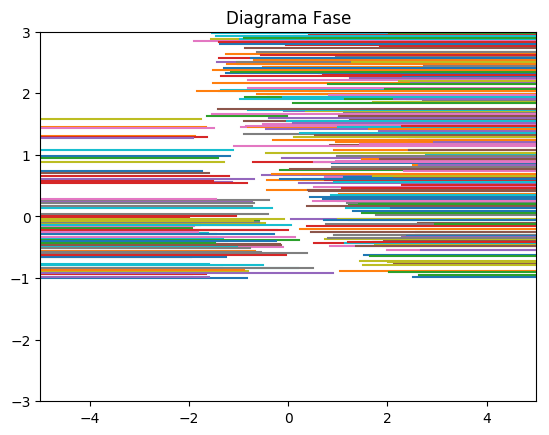

In [108]:
espaciofase2(1,1,0,0)

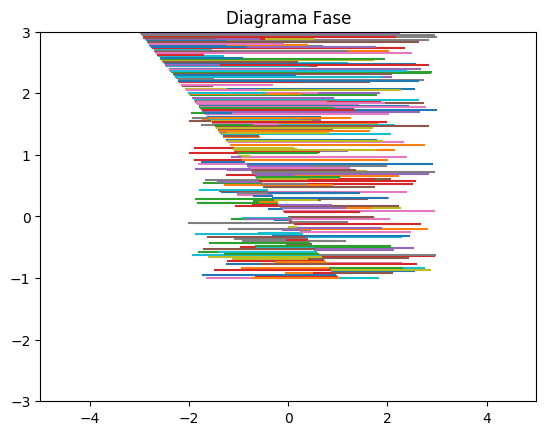

In [109]:
espaciofase2(-1,-1,0,0)

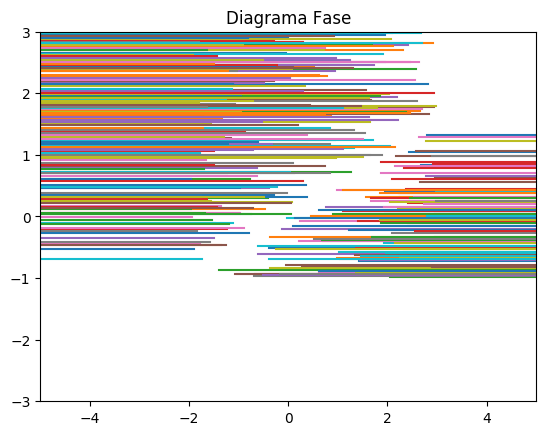

In [112]:
espaciofase2(1,-2,0,0)

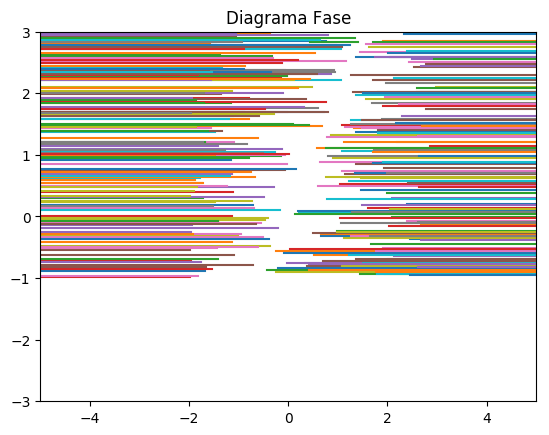

In [113]:
espaciofase2(1,-0.5,0,0)

In [114]:
espaciofase2(1,1,-1,1)

In [ ]:
espaciofase2(0,1,-1,0)

In [ ]:
espaciofase2(-1,1,-1,-1)

In [ ]:
espaciofase2(-1,-1,1,-1)

In [ ]:
espaciofase2(1,4,-2,1)